In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("assg4.csv")




In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = df[feature_name] / max_value
    return result

In [ ]:
n = dataset.shape[1]
inp_df = dataset.iloc[:, :-1];
normalized_inp_df=(inp_df-inp_df.min())/(inp_df.max()-inp_df.min())
normalized_inp_df['Y'] = dataset['Y']
dataset = normalized_inp_df
# print(normalized_inp_df)
dataset.insert(0, column='X_0', value=[1 for i in range(dataset.shape[0])])
print(dataset)

    X_0         X      Y
0     1  0.870968  392.5
1     1  0.153226   46.2
2     1  0.104839   15.7
3     1  1.000000  422.2
4     1  0.322581  119.4
..  ...       ...    ...
58    1  0.072581   87.4
59    1  0.250000  209.8
60    1  0.112903   95.5
61    1  0.427419  244.6
62    1  0.209677  187.5

[63 rows x 3 columns]


In [ ]:
train_ds = dataset.sample(frac=0.5)
print(train_ds.shape)
valid_ds = dataset.drop(train_ds.index).sample(frac=0.4)
print(valid_ds.shape)
test_ds = dataset.drop(train_ds.index).drop(valid_ds.index)
print(test_ds.shape)

(32, 3)
(12, 3)
(19, 3)


In [ ]:
learning_rate = [0.1, 0.001, 0.0001, 0.5, 1]
rho = 0.01
# max_itr = 1000

In [ ]:
def hypothesis(w, x): 
  return (w*x).sum()

In [ ]:
def get_mse(h_x, y):
  return ((h_x-y)**2).sum()/(y.shape[0]*2)


In [ ]:
def linear_regression(inp, out, alpha):
  m = inp.shape[0]
  inp = inp.to_numpy()
  out = out.to_numpy()
  w = np.array([0 for i in range(n)]) # initilalization
  h_x = [hypothesis(w, inp[i, :]) for i in range(m)]  
  mse = get_mse(h_x, out)
  mse_list = [mse]
  itr = 1
  while(True):
    new_w = [0 for i in range(n)]
    for j in range(n):
      # wj = wj - alpha*(summation)/m
      summation = 0
      for i in range(m):
        summation += (h_x[i] - out[i]) * inp[i,j]
      new_w[j] = w[j] - alpha * summation / m
    h_x = [hypothesis(new_w, inp[i, :]) for i in range(m)]  
    new_mse = get_mse(h_x, out)
    # print(mse)
    if abs(new_mse - mse) <= rho:
      break
    w = new_w
    mse = new_mse
    mse_list.append(new_mse)
    if(mse >= 234243242323434):
      break
    # if(itr > max_itr): 
    #   break
    itr += 1
  return mse_list
    

In [ ]:
for alpha in learning_rate:
  # if alpha != 0.001:
  #   continue
  print("For learning rate: ", alpha)
  print("for training samples, mse = ", linear_regression(train_ds.iloc[:, :-1], train_ds.iloc[:, -1], alpha)[-1])
  print("for validation sample, mse = ", linear_regression(valid_ds.iloc[:, :-1], valid_ds.iloc[:, -1], alpha)[-1])
  print("for test sample, mse = ", linear_regression(test_ds.iloc[:, :-1], test_ds.iloc[:, -1], alpha)[-1])

For learning rate:  0.1
for training samples, mse =  433.88586073403513
for validation sample, mse =  961.2051055925905
for test sample, mse =  543.3987688157002
For learning rate:  0.001
for training samples, mse =  566.6549171924592
for validation sample, mse =  1295.16015012699
for test sample, mse =  669.0517136485183
For learning rate:  0.0001
for training samples, mse =  1773.6773932719923
for validation sample, mse =  2459.38090850878
for test sample, mse =  1811.2922968637706
For learning rate:  0.5
for training samples, mse =  432.8156432631022
for validation sample, mse =  958.5079821335672
for test sample, mse =  542.3874907434612
For learning rate:  1
for training samples, mse =  432.6762290040856
for validation sample, mse =  958.162274609398
for test sample, mse =  542.2549366617064


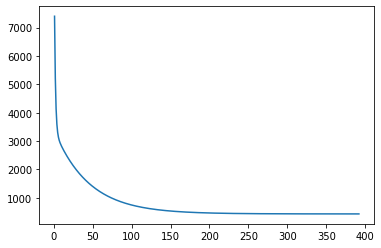

In [ ]:
train_result_big = linear_regression(train_ds.iloc[:, :-1], train_ds.iloc[:, -1], 0.3)

epoch_big = [(i+1) for i in range(len(train_result_big))]


plt.plot(epoch_big, train_result_big)
plt.show()

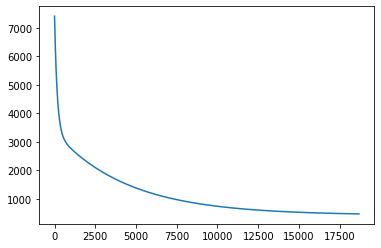

In [ ]:
train_result_small = linear_regression(train_ds.iloc[:, :-1], train_ds.iloc[:, -1], 0.003)
epoch_small = [(i+1) for i in range(len(train_result_small))]
plt.plot(epoch_small, train_result_small)
plt.show()